<a href="https://colab.research.google.com/github/vikasvishwakarma364/Analysis-of-stock/blob/main/Analysis_of_diwali_festival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Diwali Sales Data.csv",encoding = 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [ ]:
# Drop unrelated/blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [ ]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.shape

(11251, 13)

In [ ]:
# drop null values
df.dropna(inplace = True)

In [ ]:
df.shape

(11239, 13)

In [ ]:
#change data type
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
# rename column
df.rename(columns = {'Marital_Status':'Shaadi'}).head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [ ]:
# use  describe () for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [ ]:
# Exploratory Data Analysis


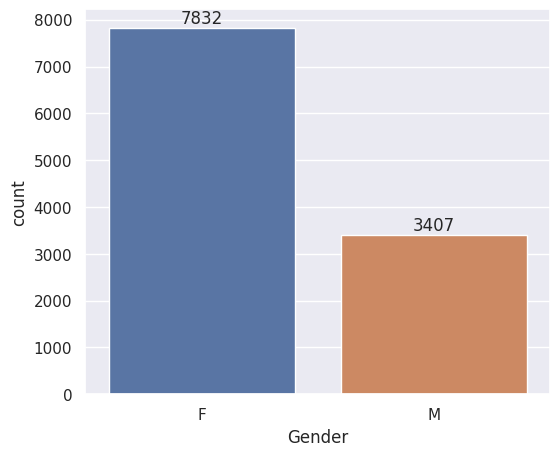

In [ ]:
# Gender
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
  ax.bar_label(bars)

In [ ]:
df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

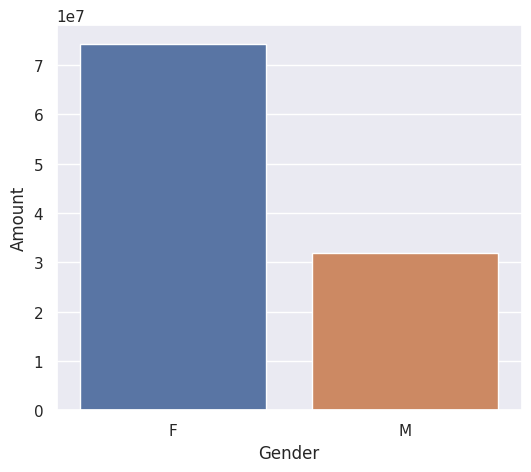

In [ ]:
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x = 'Gender',y='Amount',data = sales_gen)

In [ ]:
''' from above the graphs we can see that most of the buyers  are females and even  the
 purchasing  power  of females are greater than male'''

' from above the graphs we can see that most of the buyers  are females and even  the\n purchasing  power  of females are greater than male'

In [ ]:
# Age

<Axes: xlabel='Age Group', ylabel='count'>

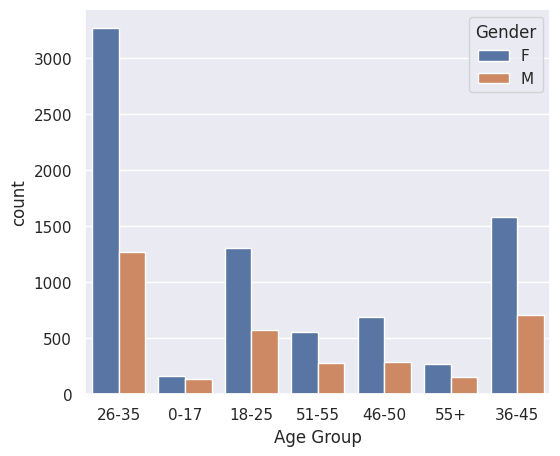

In [ ]:
sns.countplot(data = df  ,x = 'Age Group', hue= 'Gender' )

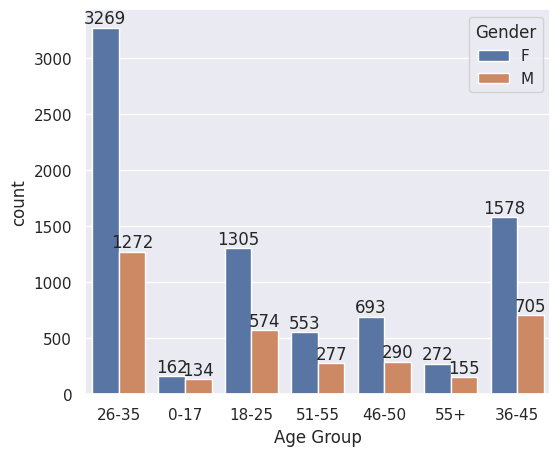

In [ ]:
ax = sns.countplot(data = df ,x = 'Age Group',hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

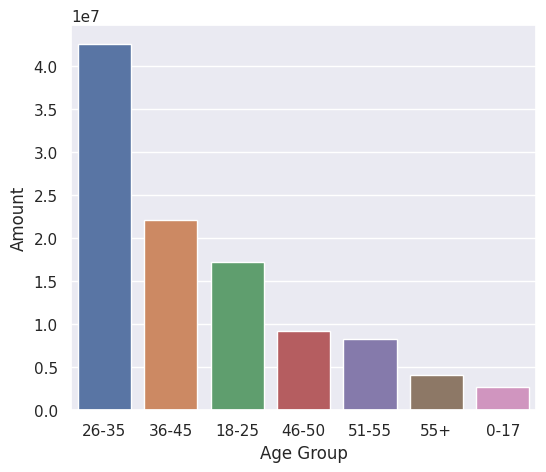

In [ ]:
# total amount vs age group
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x = 'Age Group',y='Amount',data = sales_age)

In [ ]:
''' conclusion = we can see that the most of the buyers are of the group  between 26-35 years of female'''

' conclusion = we can see that the most of the buyers are of the group  between 26-35 years of female'

In [ ]:
# STATE

<Axes: xlabel='State', ylabel='Orders'>

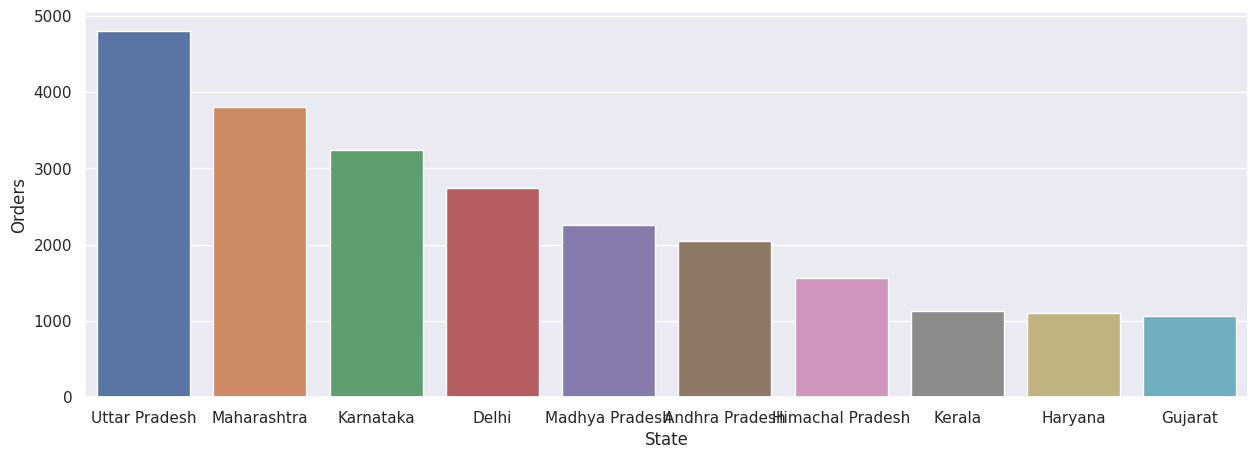

In [ ]:
sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state,x='State',y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

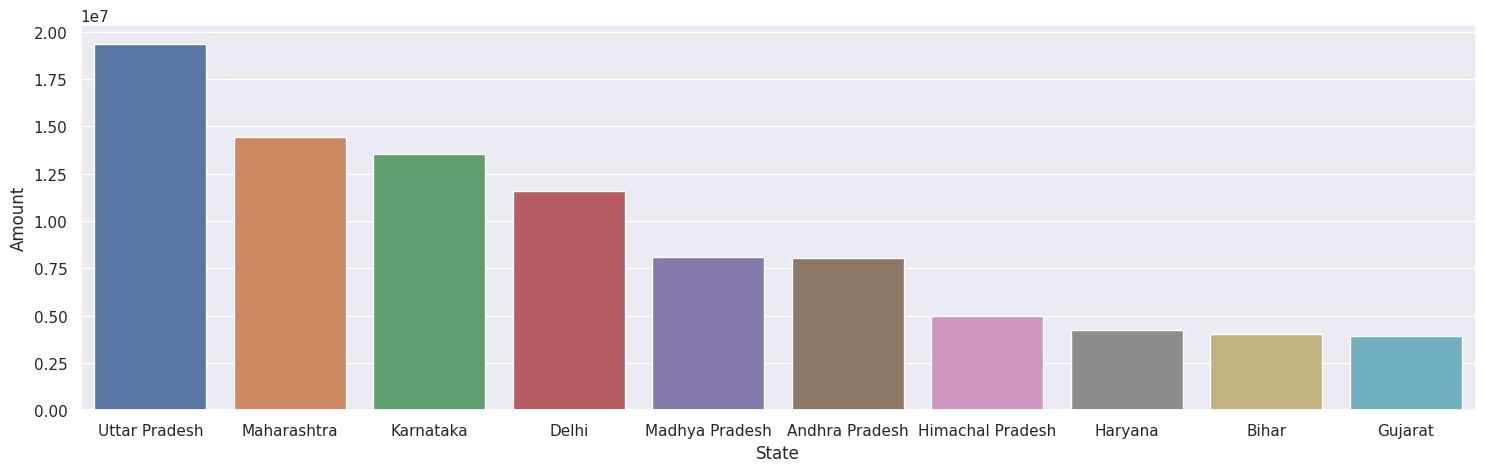

In [ ]:
# amount from top state
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state,x='State',y = 'Amount')

In [ ]:
''' from  above graphs we can see that most of the orders & total sales/amount are from the
 uttar pradesh , Maharashtra and Karnataka respectively'''

' from  above graphs we can see that most of the orders & total sales/amount are from the\n uttar pradesh , Maharashtra and Karnataka respectively'

In [ ]:
# Marital Status

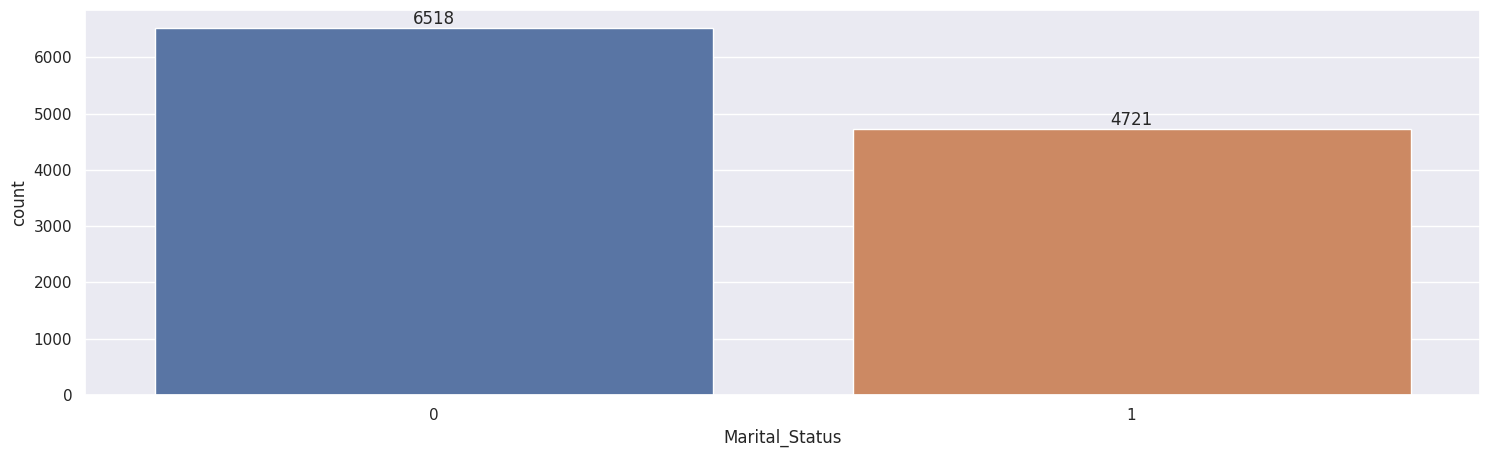

In [ ]:
ax = sns.countplot(data = df ,x = 'Marital_Status')

for bars in ax.containers:
  ax.bar_label(bars)


In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


<Axes: xlabel='Marital_Status', ylabel='Amount'>

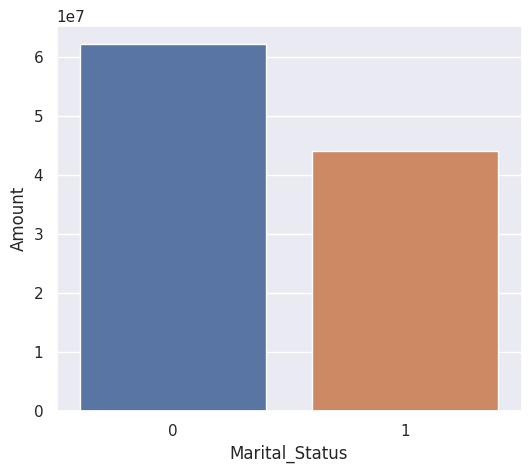

In [ ]:
sales_state = df.groupby(['Marital_Status'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state , x='Marital_Status', y = 'Amount')

In [ ]:
''' From above graps we can see that most of the buyers are married(women) and they have
    high purchasing power.'''

' From above graps we can see that most of the buyers are married(women) and they have\n    high purchasing power.'

In [ ]:
# Occupation

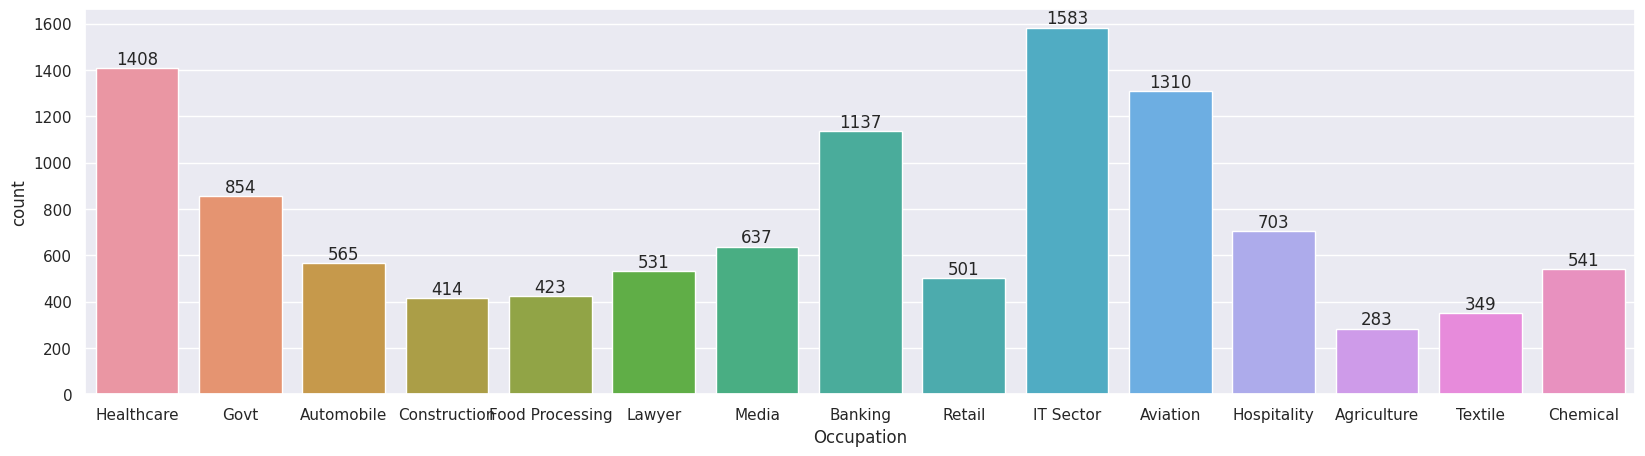

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df ,x = 'Occupation')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

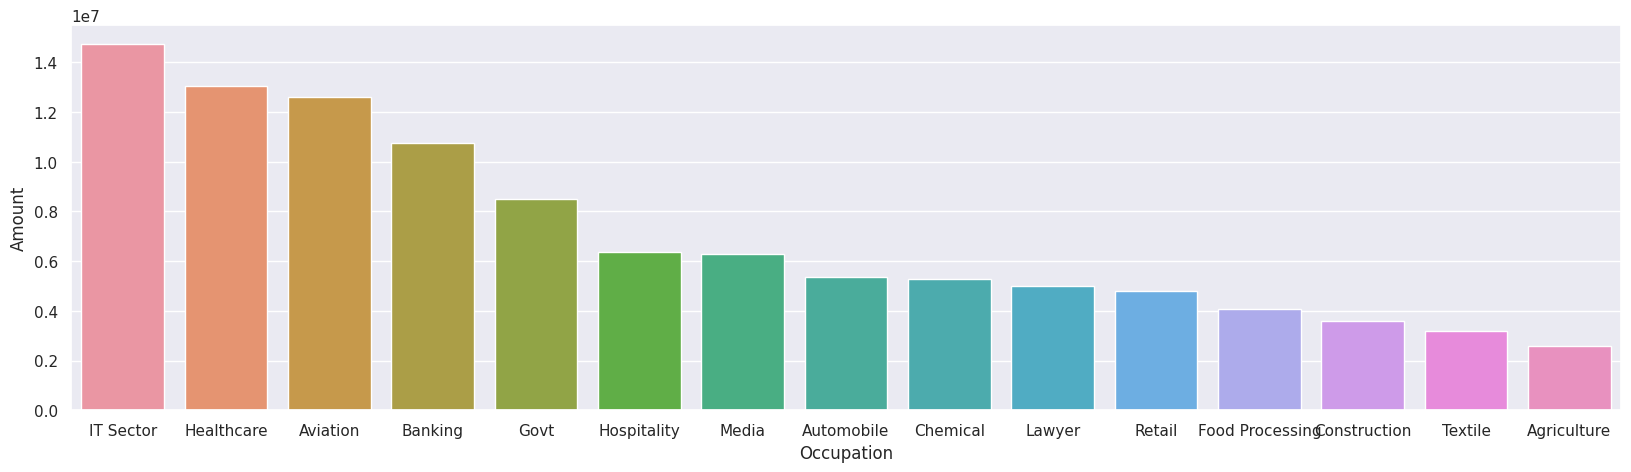

In [ ]:
sales_state = df.groupby(['Occupation'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state , x='Occupation', y = 'Amount')

In [ ]:
'''From above graps we can see that the most of the buyers are working in IT ,Aviation
   and Healthcare sector.'''

'From above graps we can see that the most of the buyers are working in IT ,Aviation \n   and Healthcare sector.'

In [ ]:
# Product Category

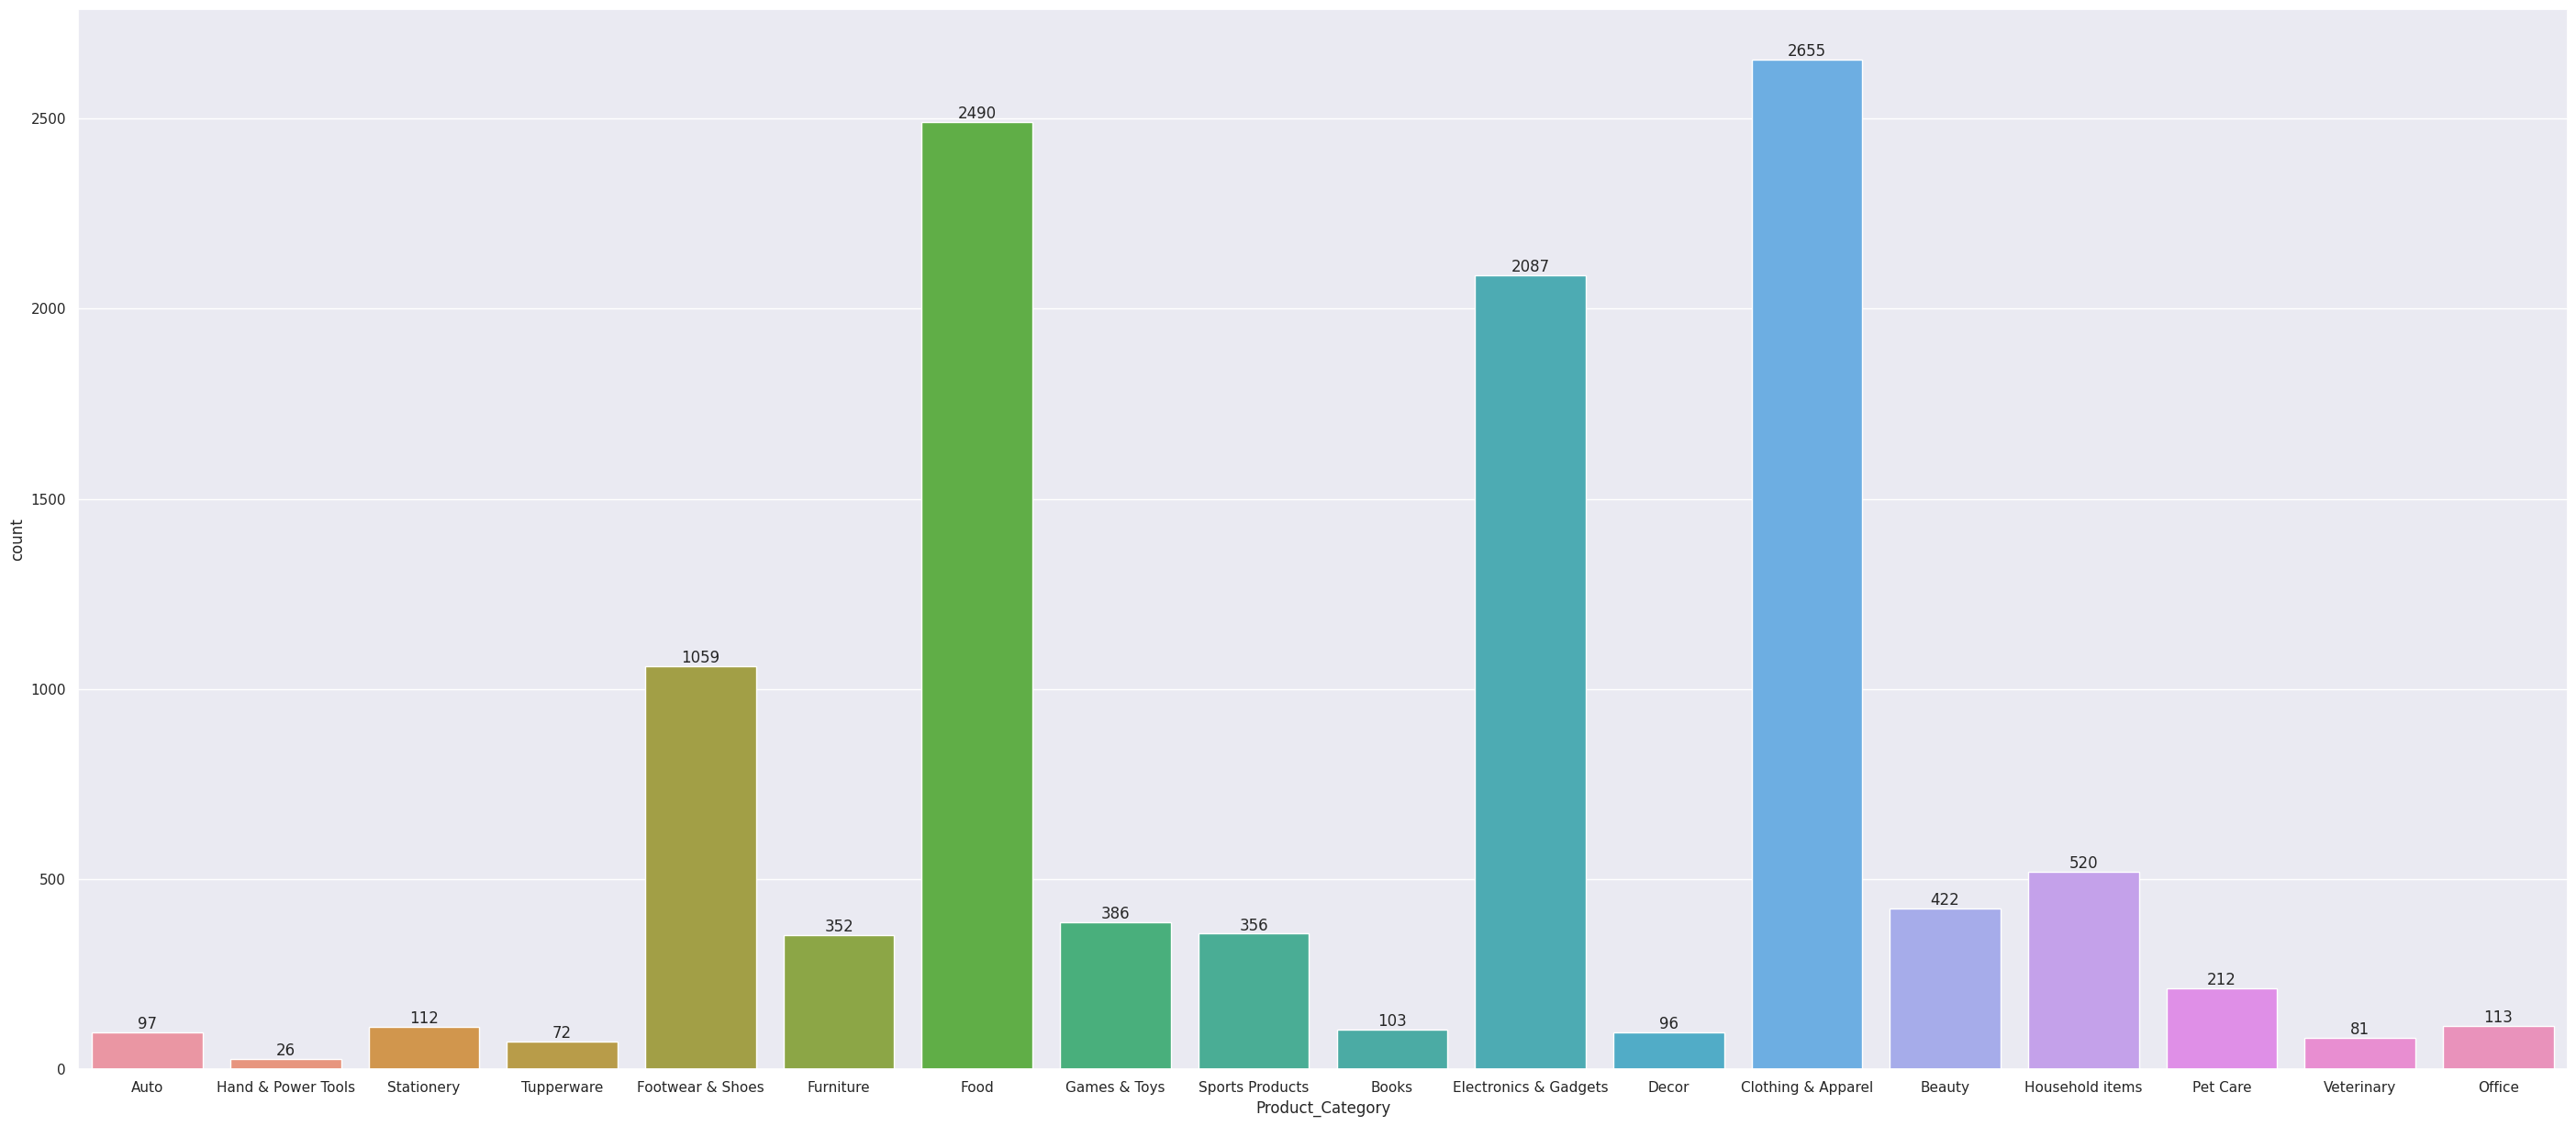

In [ ]:
sns.set(rc={'figure.figsize':(35,15)})
ax = sns.countplot(data = df ,x = 'Product_Category')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

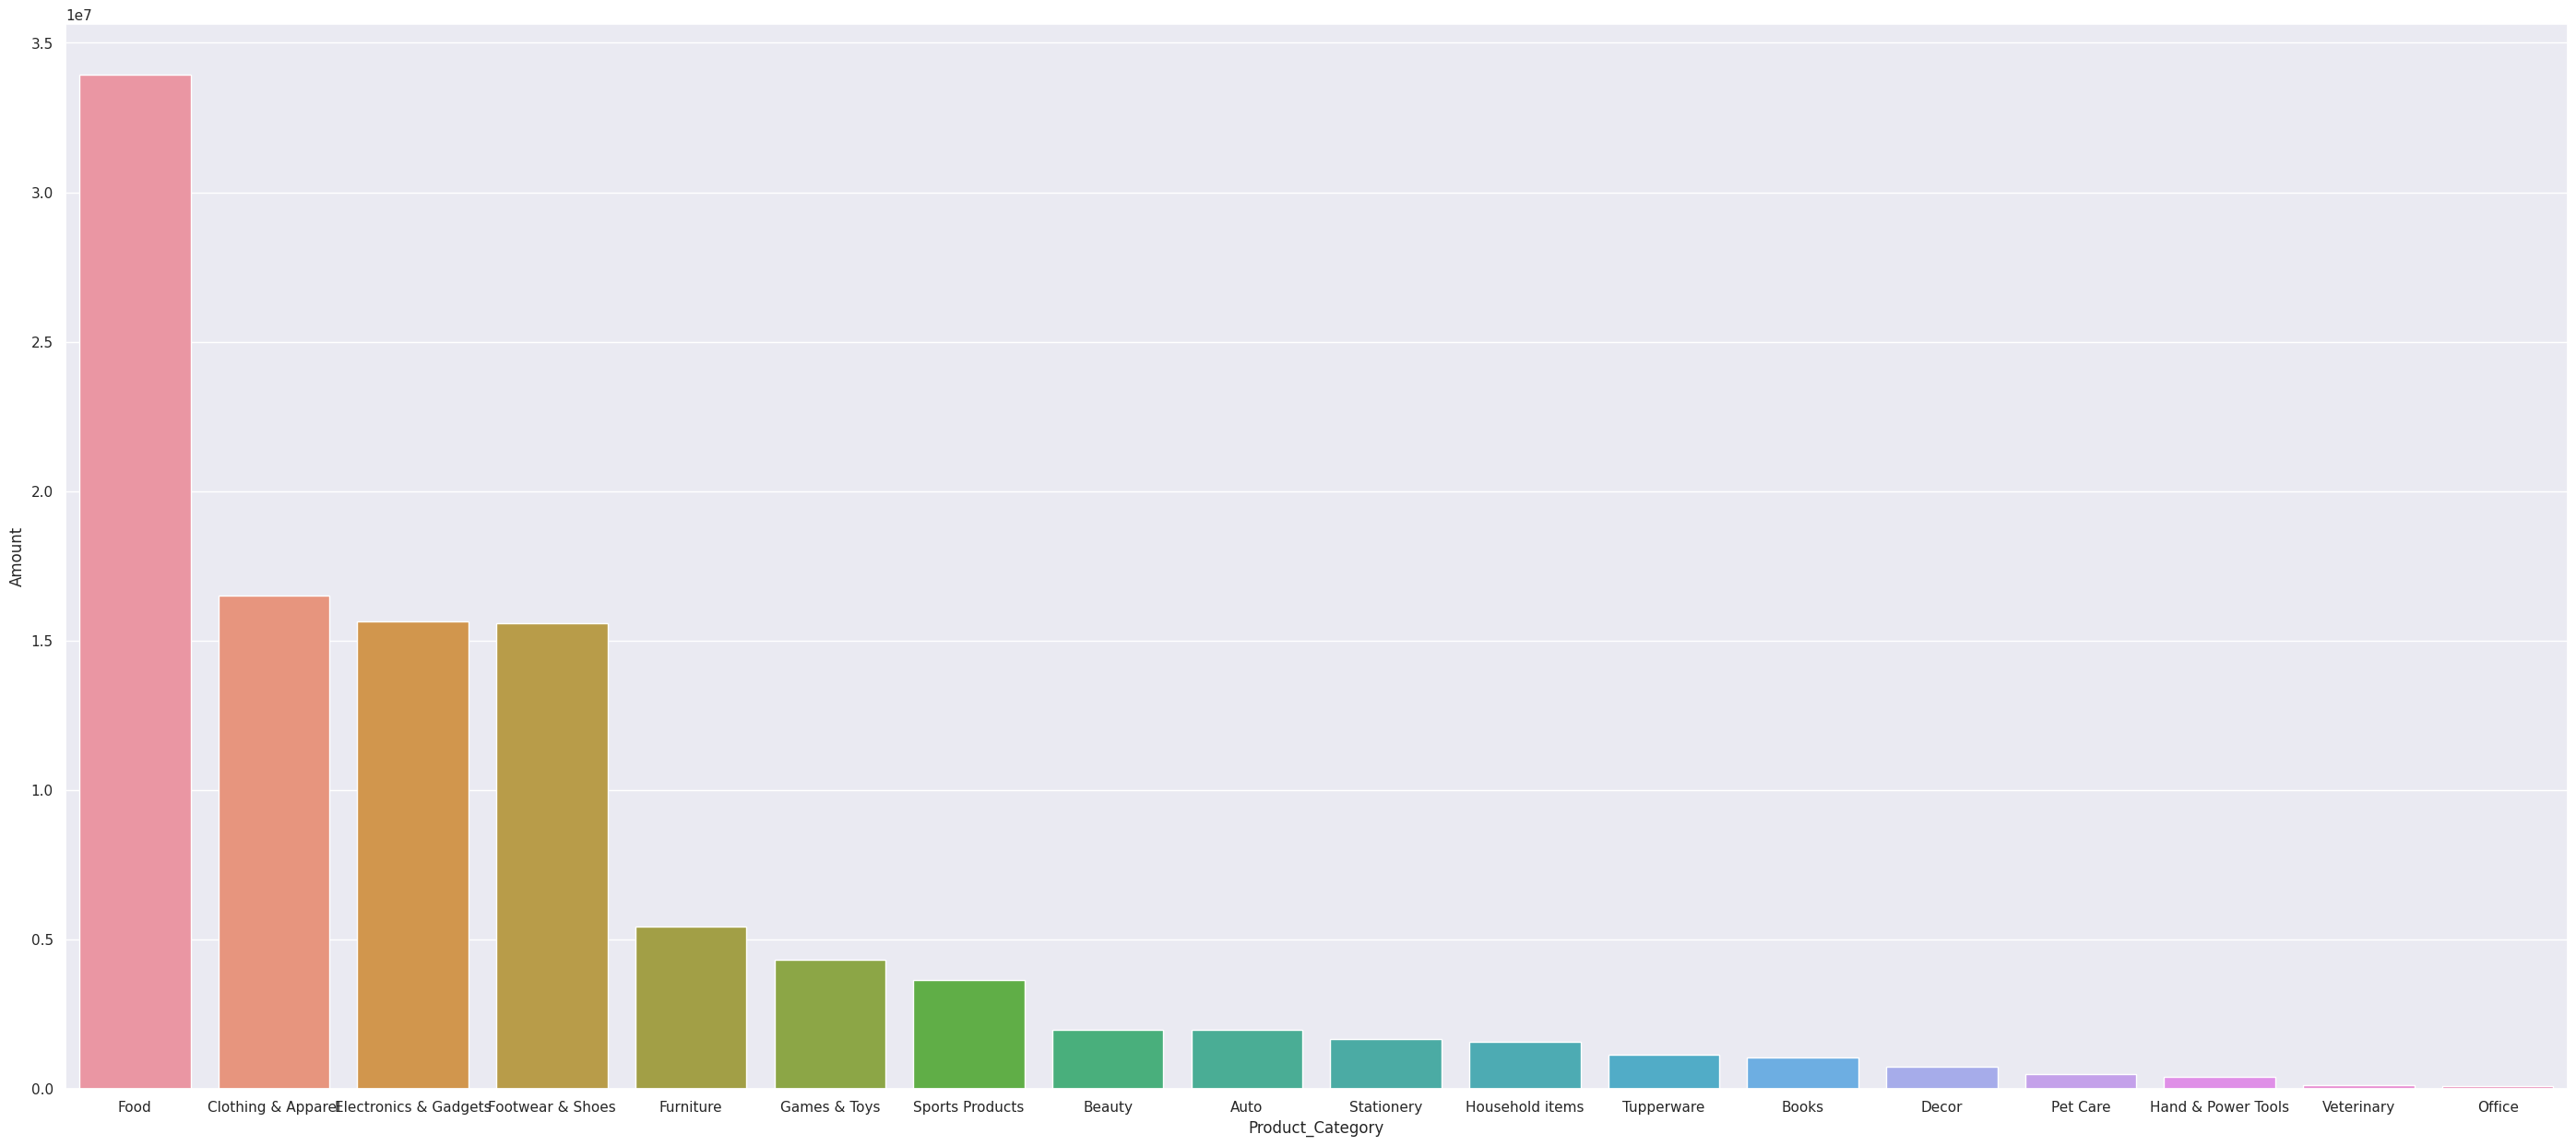

In [ ]:
sales_state = df.groupby(['Product_Category'] , as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.set(rc={'figure.figsize':(35,15)})
sns.barplot(data = sales_state , x='Product_Category', y = 'Amount')

In [ ]:
''' From above graphs we see that most of the sold product are from food , clothing,footwear
    and electronics category'''

' From above graphs we see that most of the sold product are from food , clothing,footwear \n    and electronics category'

In [ ]:
""" So final summary of diwali festival is :

   Married women  age group  26-35 yrs from  UP , Maharashtra and Karnataka working in IT ,
   Healthcare and Aviation  are more  likely  to buy  products  from food  clothing and
   electronic category."""